# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [6]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

In [3]:
print(df)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


Test the code below

In [7]:
# Define alpha_func function
def alpha_func(D, idx):
    sepal_width = D.loc[idx, 'Sepal.Width']
    sepal_length = D.loc[idx, 'Sepal.Length']
    alpha = (sepal_width / sepal_length).mean()
    return alpha

# Test function
print(alpha_func(df, range(100)))

0.5759643359353188


_(ii)_ Construct a new bootstrap data set and recompute alpha

In [8]:
rng = np.random.default_rng(0)
print(alpha_func(df, rng.choice(100, 100, replace=True)))

0.5634268056860792


Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the dataset is `Sepal.Length`. 

_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?  

Just calculating mean of Sepal.Length give us a point estimate, but it does not give info on variability. Bootstrapping allows to estimate distribution of the mean, giving us insights about variability and confidence intervals.

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [10]:
# Define boot_SE function
def boot_SE(D, alpha_func, B=1000, seed=0):
    rng = np.random.default_rng(seed)
    boot_samples = []
    for _ in range(B):
        bootstrap_indices = rng.choice(D.index, D.shape[0], replace=True)
        alpha = alpha_func(D, bootstrap_indices)
        boot_samples.append(alpha)
    return np.std(boot_samples)

# Set seed for reproducibility
np.random.seed(42)

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

In [11]:
alpha_SE = boot_SE(df, alpha_func, B=1000, seed=0)
print(alpha_SE)

0.009241610037396568


_(vi)_ What is the original mean value of `Sepal.Length`?

In [12]:
# Calculate original mean value of Sepal.Length
original_mean_sepal_length = df['Sepal.Length'].mean()
print(f'Original mean value of Sepal.Length: {original_mean_sepal_length}')

Original mean value of Sepal.Length: 5.843333333333334


Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

In [16]:
# Define bootstrapping function for Sepal.Length
def bootstrap_samples(data, n_samples=1000, seed=0):
    rng = np.random.default_rng(seed)
    samples = [data.sample(frac=1, replace=True).mean() for _ in range(n_samples)]
    return samples

# Create bootstrapped samples
boot_se_samples = bootstrap_samples(df['Sepal.Length'], n_samples=1000, seed=0)

# Calculate mean and standard deviation of bootstrapped samples
bootstrapped_mean = np.mean(boot_se_samples)
bootstrapped_std = np.std(boot_se_samples, ddof=1)

print(f'Bootstrapped mean value of Sepal.Length: {bootstrapped_mean}')
print(f'Bootstrapped standard deviation of Sepal.Length: {bootstrapped_std}')

# Calculate range of the bootstrapped samples
t_range = np.ptp(boot_se_samples)

print(f'Bootstrapped range of Sepal.Length: {t_range}')
print(f'Original mean vs Bootstrapped mean: {original_mean_sepal_length} vs {bootstrapped_mean}')

Bootstrapped mean value of Sepal.Length: 5.842439333333334
Bootstrapped standard deviation of Sepal.Length: 0.06857039851452906
Bootstrapped range of Sepal.Length: 0.44266666666666765
Original mean vs Bootstrapped mean: 5.843333333333334 vs 5.842439333333334


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [14]:
# Compute 95% confidence intervals for bootstrapped mean values
ci_lower = np.percentile(boot_se_samples, 2.5)
ci_upper = np.percentile(boot_se_samples, 97.5)

print(f'95% confidence interval for the mean value of Sepal.Length: ({ci_lower}, {ci_upper})')

95% confidence interval for the mean value of Sepal.Length: (5.710633333333334, 5.972683333333333)


_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

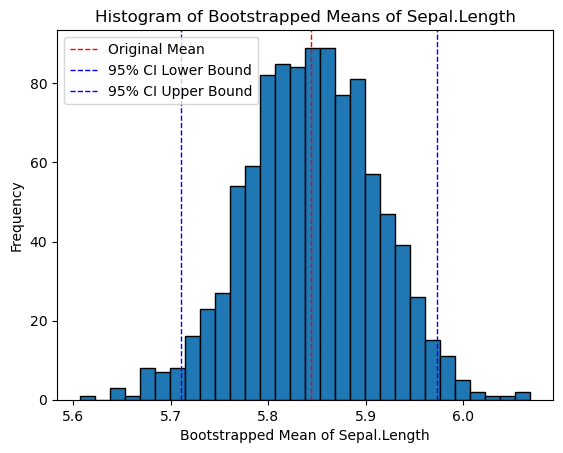

In [15]:
# Create figure and axis
fig, ax = plt.subplots()

# Create histogram
ax.hist(boot_se_samples, bins=30, edgecolor='black')

# Add title
ax.set_title('Histogram of Bootstrapped Means of Sepal.Length')

# Add label to the x-axis
ax.set_xlabel('Bootstrapped Mean of Sepal.Length')

# Add label to the y-axis
ax.set_ylabel('Frequency')

# Add vertical lines for original mean and confidence intervals
ax.axvline(original_mean_sepal_length, color='red', linestyle='dashed', linewidth=1, label='Original Mean')
ax.axvline(ci_lower, color='blue', linestyle='dashed', linewidth=1, label='95% CI Lower Bound')
ax.axvline(ci_upper, color='blue', linestyle='dashed', linewidth=1, label='95% CI Upper Bound')

# Add legend
ax.legend()

# Show plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

1). The average sepal length is around 5.84 cm. This value is quite reliable because we did a lot of resampling, so it's good to use for planning how much space the irises will need in the shipment.

2). The 95% confidence interval ranges from about 5.72 cm to 5.98 cm. This means that in most cases, the sepal lengths will fall in this range. It's useful to consider this range to avoid any surprises with the size of the irises.

3). Using this average and the confidence interval can help the company optimize space in the shipping containers. This can lead to cost savings and make sure the irises are packed efficiently.

4). By using bootstrapping, we understand the variability better. So, it's a good idea to keep in mind that there might be slight variations, but they are within a predictable range.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [X] Created a branch with the correct naming convention.
- [X] Ensured that the repository is public.
- [X] Reviewed the PR description guidelines and adhered to them.
- [X] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
